In [22]:
%pylab inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 8  # that's default image size for this interactive session

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['specgram']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# TimeSide API

*Timeside* API is based on different core processing unit called *processors* :

- Decoders (*timeside.api.IDecoder*) that enables to decode a giving audio source and split it up into frames for further processing
- Analyzers (*timeside.api.IAnalyzer*) that provides some signal processing module to analyze incoming audio frames
- Encoders (*timeside.api.IEncoder*) that can encode incoming frames back into an audio object
- Graphers (*timeside.api.IGrapher*) that can display some representations of the signal or corresponding extracted features

## Decoders

In [23]:

import timeside.core

from timeside.core import list_processors

print(list_processors(timeside.core.api.IDecoder))

IDecoder
  * array_decoder 1.0: Decoder taking Numpy array as input
  * aubio_decoder 1.0: File decoder based on aubio 
  * file_decoder 1.0: File Decoder based on Gstreamer



## Analyzers

In [24]:
print(list_processors(timeside.core.api.IAnalyzer))

IAnalyzer
  * aubio_melenergy 0.4.6: Aubio Mel Energy analyzer
  * aubio_mfcc 0.4.6: Aubio MFCC analyzer
  * aubio_pitch 0.4.6: Aubio Pitch estimation analyzer
  * aubio_silence 0.4.6: Aubio Silence detection analyzer
  * aubio_specdesc 0.4.6: Aubio Spectral Descriptors collection analyzer
  * aubio_temporal 0.4.6: Aubio Temporal analyzer
  * essentia_dissonance 2.1b5.dev416: Dissonance from Essentia
  * vamp_constantq 1.1.0: Constant Q transform from QMUL vamp plugins
  * vamp_crest 1.0.0: Extract the spectral crest measure of an audio spectrum
  * vamp_flatness 1.0.0: Extract the flatness of an audio spectrum
  * vamp_kurtosis 1.0.0: Extract the kurtosis of a range of values
  * vamp_simple_host 1.1.0: Vamp plugins library interface analyzer
  * vamp_spectral_centroid 1.0.0: Calculate the centroid frequency of the spectrum of the input signal
  * vamp_spectral_kurtosis 1.0.0: Extract the kurtosis of an audio spectrum
  * vamp_spectral_slope 1.0.0: Extract the spectral slope of an aud

## Encoders

In [25]:
print(list_processors(timeside.core.api.IEncoder))

IEncoder
  * flac_aubio_encoder 1.0: FLAC encoder based on aubio
  * vorbis_aubio_encoder 1.0: OGG Vorbis encoder based on aubio
  * wav_aubio_encoder 1.0: Wav encoder based on aubio
  * live_encoder 1.0: Gstreamer-based Audio Sink
  * flac_encoder 1.0: FLAC encoder based on Gstreamer
  * aac_encoder 1.0: AAC encoder based on Gstreamer
  * mp3_encoder 1.0: MP3 encoder based on Gstreamer
  * vorbis_encoder 1.0: OGG Vorbis encoder based on Gstreamer
  * opus_encoder 1.0: Opus encoder based on Gstreamer
  * wav_encoder 1.0: WAV encoder based on Gstreamer
  * webm_encoder 1.0: WebM encoder based on Gstreamer



## Graphers

In [26]:
print(list_processors(timeside.core.api.IGrapher))

IGrapher
  * grapher_aubio_pitch 1.0: Image representing Pitch
  * grapher_aubio_silence 1.0: Image representing Aubio Silence
  * grapher_dissonance 1.0: Image representing Dissonance
  * grapher_vamp_cqt 1.0: Image representing Constant Q Transform
  * grapher_loudness_itu 1.0: Image representing Loudness ITU
  * spectrogram 1.0: Image representing Linear Spectrogram
  * grapher_onset_detection_function 1.0: Image representing Onset detection
  * grapher_waveform 1.0: Image representing Waveform from Analyzer
  * spectrogram_log 1.0: Logarithmic scaled spectrogram (level vs. frequency vs. time).
  * spectrogram_lin 1.0: Linear scaled spectrogram (level vs. frequency vs. time).
  * waveform_simple 1.0: Simple monochrome waveform image.
  * waveform_centroid 1.0: Waveform where peaks are colored relatively to the spectral centroids of each frame buffer.
  * waveform_contour_black 1.0: Black amplitude contour waveform.
  * waveform_contour_white 1.0: an white amplitude contour wavform.


## Processors pipeline

All these processors can be chained to form a process pipeline.

Let first define a decoder that reads and decodes audio from a file

In [27]:
from timeside.core import get_processor

from timeside.core.tools.test_samples import samples
file_decoder = get_processor('file_decoder')(samples['C4_scale.wav'])

And then some other processors

In [28]:
# analyzers
pitch = get_processor('aubio_pitch')()
level = get_processor('level')()

# Encoder
mp3 = get_processor('mp3_encoder')('/tmp/guitar.mp3', overwrite=True)

# Graphers
specgram = get_processor('spectrogram_lin')()
waveform = get_processor('waveform_simple')()

Let's now define a process pipeline with all these processors and run it

In [29]:
pipe = (file_decoder | pitch | level | mp3 | specgram | waveform)
pipe.run()

Analyzers results are available through the pipe:

In [30]:
pipe.results.keys()

dict_keys(['63921b5c-bb7a-457f-bed3-23143ecf0a13', 'c461920d-c32c-425d-a549-4504721115ae'])

or from the analyzer:

In [31]:
pitch.results.keys()

dict_keys(['aubio_pitch.pitch', 'aubio_pitch.pitch_confidence'])

In [32]:
pitch.results['aubio_pitch.pitch'].keys()

['id_metadata', 'data_object', 'audio_metadata', 'parameters']

In [33]:
pitch.results['aubio_pitch.pitch']

AnalyzerResult(id_metadata=IdMetadata(id='aubio_pitch.pitch', name='F0 (aubio) pitch', unit='Hz', description='Aubio Pitch estimation analyzer', date='2022-12-23 14:27:36', version='1.0', author='TimeSide', proc_uuid='63921b5c-bb7a-457f-bed3-23143ecf0a13'), data_object=FrameValueObject(value=array([266.7347 , 263.19116, 263.19116, 263.1912 , 263.19116, 263.19116,
       263.19107, 263.19116, 263.19116, 263.19116, 263.19125, 263.19116,
       263.19116, 263.19116, 263.19104, 263.19113, 263.19116, 263.19116,
       263.19125, 263.19116, 263.19113, 263.19116, 263.19107, 263.1912 ,
       263.19107, 263.19125, 263.19107, 263.19104, 263.19116, 263.19125,
       263.19128, 263.19116, 263.19116, 263.19116, 263.19122, 263.19116,
       263.19125, 263.19125, 263.19116, 263.19107, 263.19107, 263.19122,
       263.19116, 268.12445,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     , 319.86548, 296.1497 , 295.05573,
       295.05582, 295.0559 , 295.05582, 295.0559 ,

Grapher result can also be display or save into a file

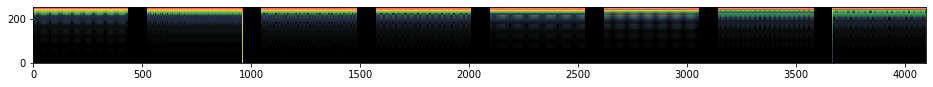

In [34]:
imshow(specgram.render(), origin='lower')

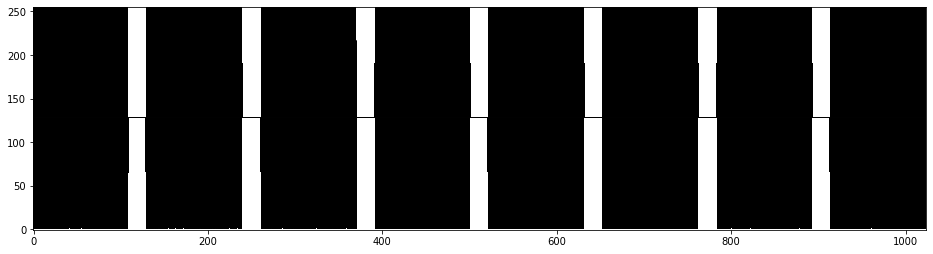

In [35]:
imshow(waveform.render(), origin='lower')

In [36]:
waveform.render('/tmp/waveform.png')

## And TimeSide can be embedded into a web page dynamically. For example, in Telemeta:

In [37]:
from IPython.display import HTML
HTML('<iframe width=1300 height=260 frameborder=0 scrolling=no marginheight=0 marginwidth=0 src=http://demo.telemeta.org/archives/items/6/player/1200x170></iframe>')